# Working with images in Python

In [1]:
# install pillow with: pip install pillow
from PIL import Image
import numpy as np

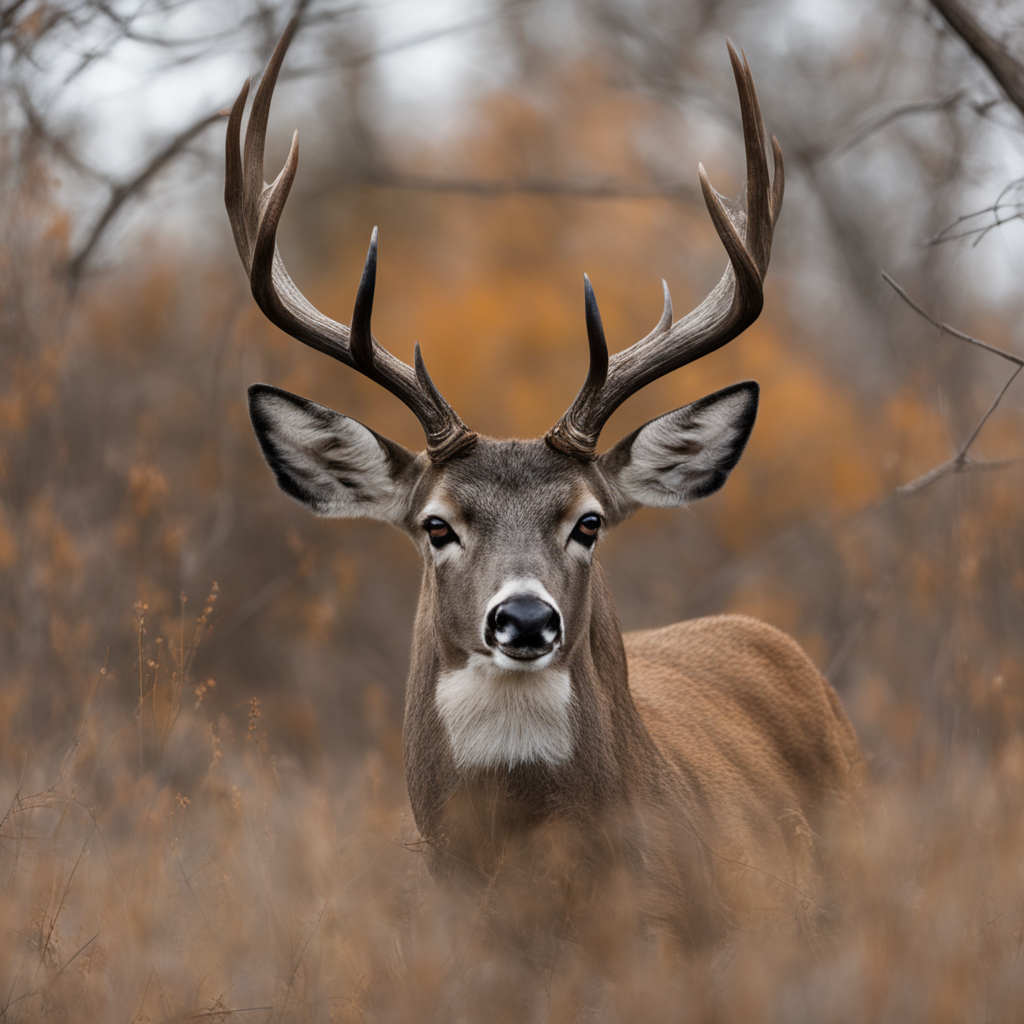

In [4]:
# opening the image and converting it to a numpy array
img = Image.open('./images/deer.png')
img

In [5]:
# images are stored as numpy arrays
img_array = np.array(img)
img_array

array([[[119, 117, 117],
        [126, 124, 125],
        [131, 129, 129],
        ...,
        [164, 165, 167],
        [166, 165, 168],
        [168, 166, 169]],

       [[118, 116, 116],
        [125, 123, 123],
        [128, 123, 125],
        ...,
        [165, 165, 168],
        [169, 168, 170],
        [170, 168, 170]],

       [[112, 109, 111],
        [119, 116, 117],
        [127, 123, 126],
        ...,
        [168, 168, 171],
        [169, 169, 172],
        [170, 170, 173]],

       ...,

       [[103,  83,  69],
        [104,  84,  68],
        [101,  78,  65],
        ...,
        [117,  88,  67],
        [116,  89,  66],
        [117,  89,  66]],

       [[105,  83,  69],
        [104,  83,  69],
        [103,  80,  67],
        ...,
        [116,  87,  66],
        [116,  88,  66],
        [116,  88,  65]],

       [[ 98,  77,  62],
        [100,  79,  65],
        [102,  80,  66],
        ...,
        [117,  88,  66],
        [115,  87,  66],
        [116,  87,  65]]

What is the shape of the array? What do the dimensions mean?

In [6]:
img_array.shape

(1024, 1024, 3)

An explanation of the dimensions of an image array:

- The first dimension is the height of the image (in pixels).
- The second dimension is the width of the image (in pixels).
- The third dimension is the number of channels in the image. An RGB image has three channels (red, green, and blue)

<img src="images/RGB_channels_separation.png" style="height: 300px">

So each cell in the array represents a pixel value of each basic color (R, G or B).

What are the ranges of the pixel values?

In [7]:
img_array.max()

246

In [8]:
img_array.min()

0

The range of the pixel values is from 0 to 255. 0 means no color (black) and 255 means full color (white).

**Substract the mean of the image from each pixel. What happens to the image?**

Make sure to avoid values outside the range 0-255 after the operation.

In [9]:
mean = img_array.mean()
img_no_mean = img_array - mean

img_no_mean[img_no_mean < 0] = 0
img_no_mean[img_no_mean > 255] = 255
img_no_mean = img_no_mean.astype(np.uint8)

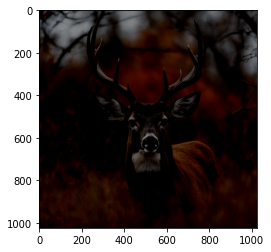

In [10]:
import matplotlib.pyplot as plt

# function to plot images
plt.imshow(img_no_mean)

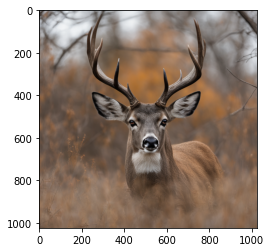

In [11]:
plt.imshow(img_array)

## Blending two images together! ⚗️

Since images are arrays, we perform any operation over them, like adding, substracting, multiplying, etc.

Let's compute the average of two images:

In [12]:
image1 = Image.open('images/deer.png')
image1_arr = np.array(image1)

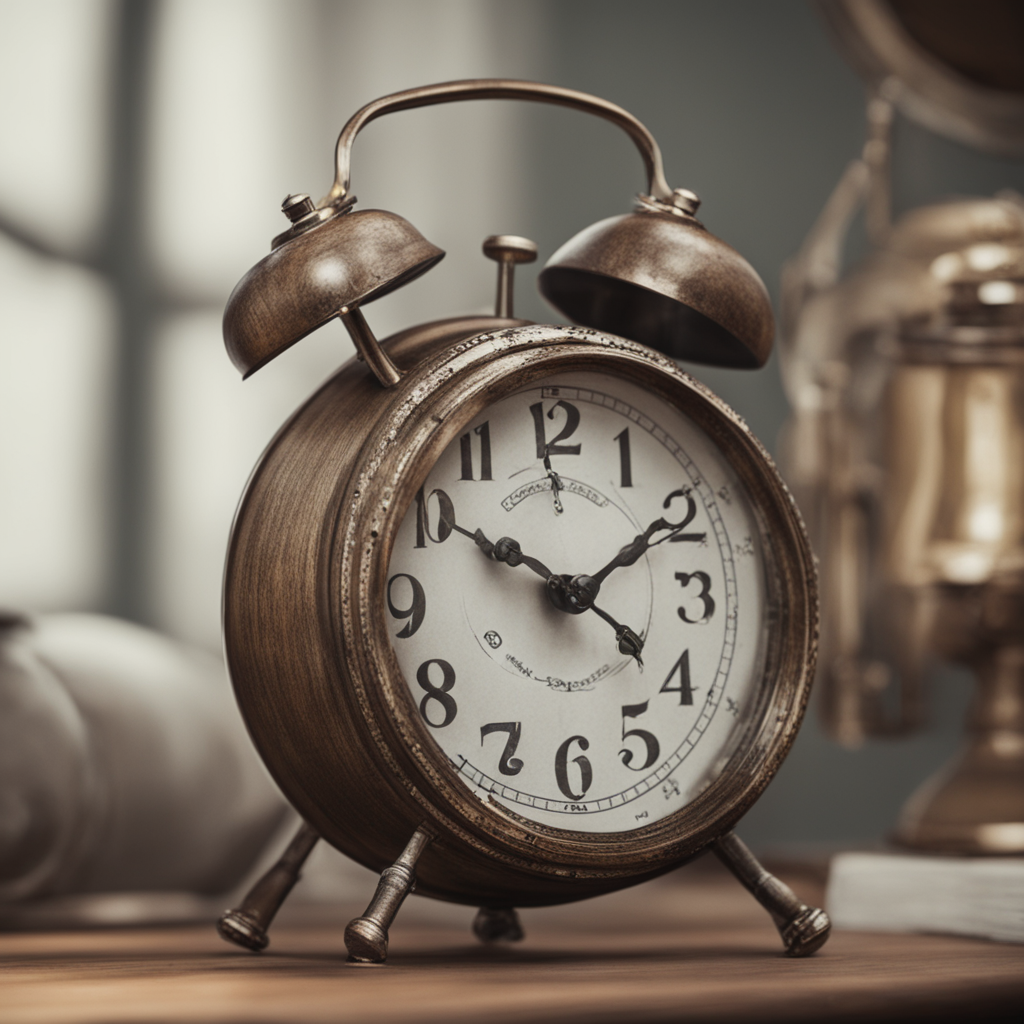

In [13]:
image2 = Image.open('images/clock.png')
image2

In [14]:
image2_arr = np.array(image2)
image2_arr.shape

(1024, 1024, 3)

We compute the average of two vectors as

$$
x = \frac{1}{2} (x_1 + x_2)
$$

In [19]:
image_blend = 0.8 * image1_arr + 0.2 * image2_arr

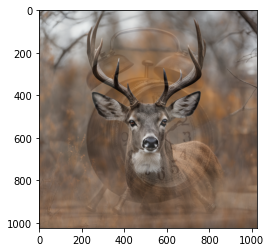

In [18]:
# Remember to clip pixel values to between 0 and 255
image_blend[image_blend < 0] = 0
image_blend[image_blend > 255] = 255
image_blend = image_blend.astype(np.uint8)  # convert to integers

plt.imshow(image_blend)

That was the result of blending two images together, in the pixel vector space. 

It's not very pretty right? Let's try something else.

In [20]:
#!pip install replicate

import replicate
import os

os.environ['REPLICATE_API_TOKEN'] = 'r8_...api_here...'

In [21]:
def plot_two_images_side_by_side(image1_path, image2_path):
    image1 = Image.open(image1_path)
    image2 = Image.open(image2_path)
    image1_arr = np.array(image1)
    image2_arr = np.array(image2)
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(image1_arr)
    axs[0].axis('off')
    axs[1].imshow(image2_arr)
    axs[1].axis('off')
    plt.show()



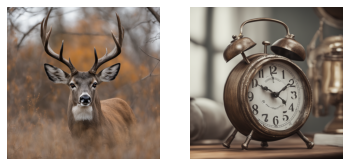

In [22]:
image1_path = 'images/deer.png'
image2_path = 'images/clock.png'

plot_two_images_side_by_side(image1_path, image2_path)

In [23]:

deployment = replicate.deployments.get("vicgalle/image-blending")
prediction = deployment.predictions.create(
  input={"image1": open("images/deer.png", "rb"),
         "image2": open("images/clock.png", "rb"),
         "prompt": ""}
)
prediction.wait()
print(prediction.output)

https://replicate.delivery/pbxt/d9Hw4ntgVT6UBR2nYRgUfzNIxQloM2k3eyCLqDfffl9Nz4dRC/output.png


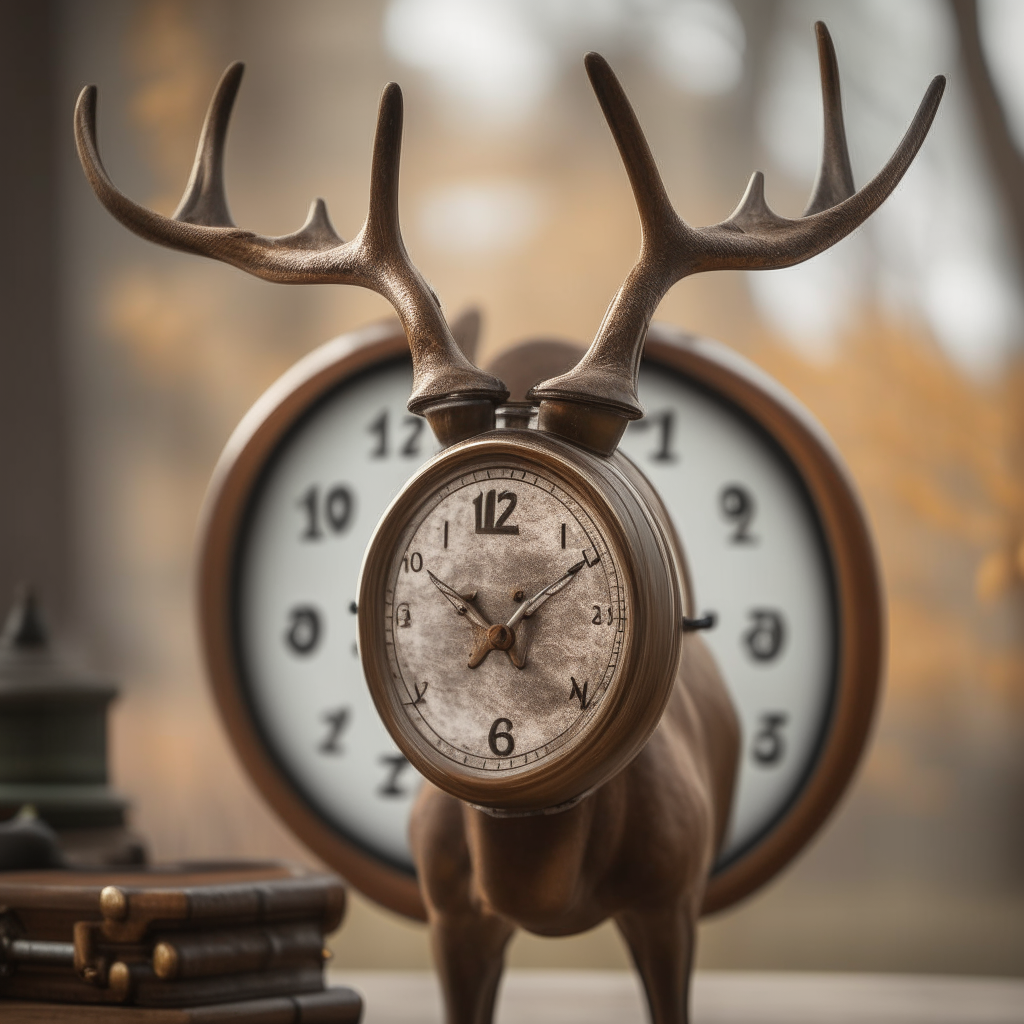

In [25]:
import requests
Image.open(requests.get(prediction.output, stream=True).raw)

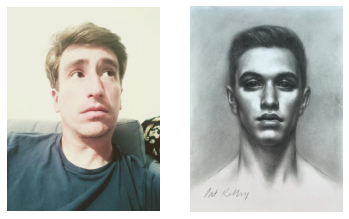

In [26]:
image1_path = "images/vic.JPG"
image2_path = "images/portrait.png"

plot_two_images_side_by_side(image1_path, image2_path)

In [104]:

deployment = replicate.deployments.get("vicgalle/image-blending")
prediction = deployment.predictions.create(
  input={"image1": open("images/vic.JPG", "rb"),
         "image2": open("images/portrait.png", "rb"),
         "prompt": ""}
)
prediction.wait()
print(prediction.output)

https://replicate.delivery/pbxt/tbgEclwXRSbrNJIzzMeDPkygQzE1hhcJKKDCQsWgSnuAa2FJA/output.png


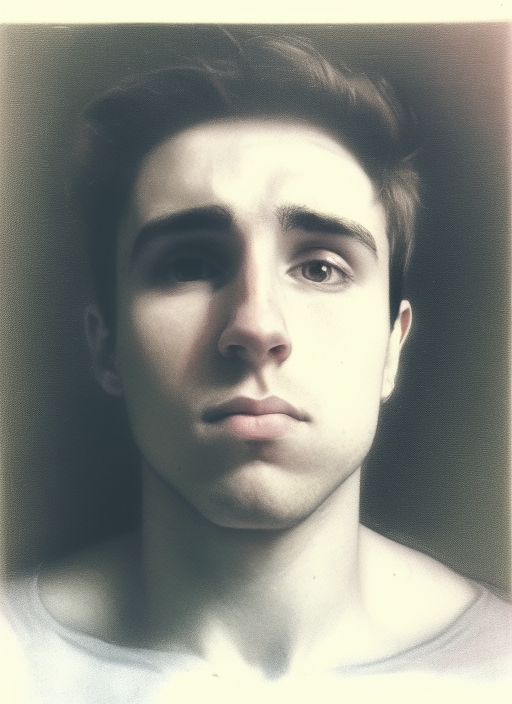

In [105]:
Image.open(requests.get(prediction.output, stream=True).raw)

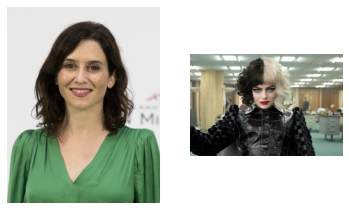

In [114]:
image1_path = "images/ayuso.jpg"
image2_path = "images/cruella.jpeg"

plot_two_images_side_by_side(image1_path, image2_path)

In [115]:

deployment = replicate.deployments.get("vicgalle/image-blending")
prediction = deployment.predictions.create(
  input={"image1": open(image1_path, "rb"),
         "image2": open(image2_path, "rb"),
         "prompt": ""}
)
prediction.wait()
print(prediction.output)

https://replicate.delivery/pbxt/lEgCRszhKnKXOBw3OgZVO1yzZNg9TQCBCGKDKwqB6rZdN7iE/output.png


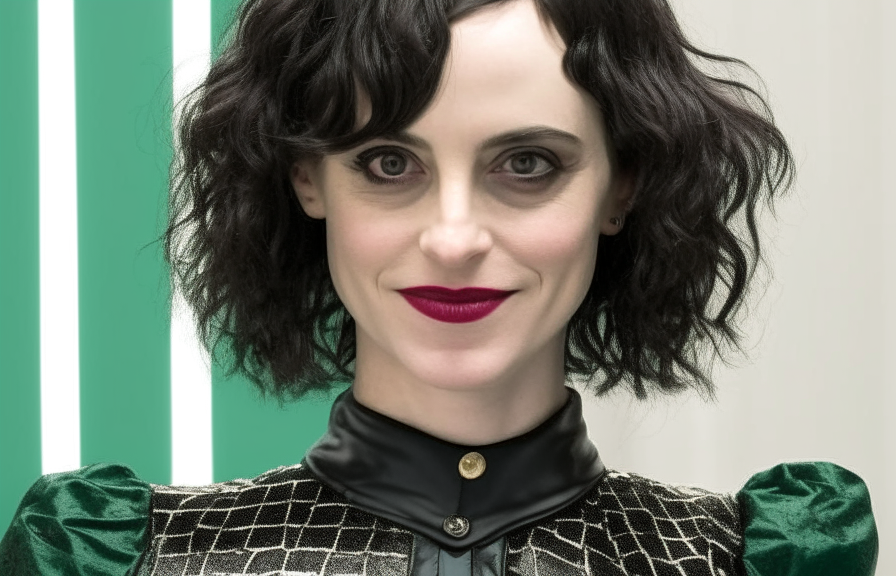

In [116]:
Image.open(requests.get(prediction.output, stream=True).raw)

<div class="alert alert-block alert-success">
Deep learning allows to learn a "good" representation of the images (also as vectors in a high-dimensional space), so we can operate over them in a more meaningful way.
</div>
